#Sentiment Analysis and Modeling for Amazon

Amazon is a global e-commerce platform where millions of products are reviewed. This project aims to analyze and model the sentiments expressed in Amazon customer reviews.

By analyzing the reviews and the ratings given, in-depth information about customer satisfaction and preferences can be obtained.These info can contribute to product development, targeted marketing strategies, and improvement of customer services.

 A successful sentiment analysis and modeling implementation can significantly contribute to increasing customer trust and loyalty, and helps in business growth.

sentiment analysis and sentiment modeling on the review texts to understand customer preferences and satisfaction levels.

#####Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

#####Adjusting Row Column Setting

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format',lambda x: '%.2f' % x)

Text Preprocessing

In [3]:
df=pd.read_csv('amazon_reviews.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


Normalizing Case Folding

converted the comments in the 'reviewText' column to lowercase. This standardizes the data into a uniform format

In [4]:
df['reviewText']

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [5]:
df['reviewText']=df['reviewText'].str.lower()
df['reviewText']

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

Punctuations

removed punctuation marks from the comments in the 'reviewText' column

In [6]:
df['reviewText']=df['reviewText'].str.replace('[^\w\s]','',regex=True) #removes all punctuation and special characters
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

Numbers

 removed numerical characters

In [7]:
df['reviewText']=df['reviewText'].str.replace('\d','',regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

Stopwords

removing frequently repeated and often meaningless words (such as 'the', 'is', 'in') from our texts

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
sw=stopwords.words('english')

In [10]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

Rarewords

 we first combined all comments in the 'reviewText' column, then split the resulting text into words and calculated the frequency of each word. As a result of this process, we identified words that only appear once. Subsequently, we removed these rarely used words

In [12]:
temp_df=pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
sharper          1
cheapos          1
gate             1
measuring        1
stealwould       1
Name: count, Length: 9701, dtype: int64

In [13]:
drops=temp_df[temp_df<=1]

In [14]:
df['reviewText']=df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [15]:
temp_df_1=pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df_1

card            4603
gb              1725
phone           1685
works           1559
great           1445
                ... 
itupdate           2
intermittant       2
pennies            2
suffer             2
chkdsk             2
Name: count, Length: 4089, dtype: int64

Tokenization

transformed each comment in the 'reviewText' column into a TextBlob object and then tokenized them into words. TextBlob allows us to easily split comments into processable tokens (words). This process enables us to examine the words in each comment

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
df['reviewText'].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

Lemmatization

Lemmatization reduces different inflected forms of words (like 'running' to 'run') to their base form.

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
df['reviewText']=df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewText']

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

#####Text Visualization

Calculating of Term Frequencies

we calculated the frequencies (tf, or term frequency) of all words.

We separated the words in each comment, determined how many times each word appeared in that comment, and summed these numbers. Then, we converted these frequencies into a DataFrame and named the columns 'words' and 'tf'. Finally, we sorted this DataFrame in descending order of 'tf' values.

This process helps us identify the most frequently used words in the comments

In [21]:
tf=df['reviewText'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns=['words','tf']
tf_sorted=tf.sort_values('tf',ascending=False)
tf_sorted

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2721,sizethe,2.00
2719,everybody,2.00
2717,lived,2.00
3687,chkdsk,2.00


Barplot

based on the previously calculated term frequencies (tf), we filtered words with a frequency of more than 500. Then, we visualized the frequencies of these words using a bar graph.

 x-axis represents the words, and the y-axis shows the total number of times these words appear in the comments (tf)

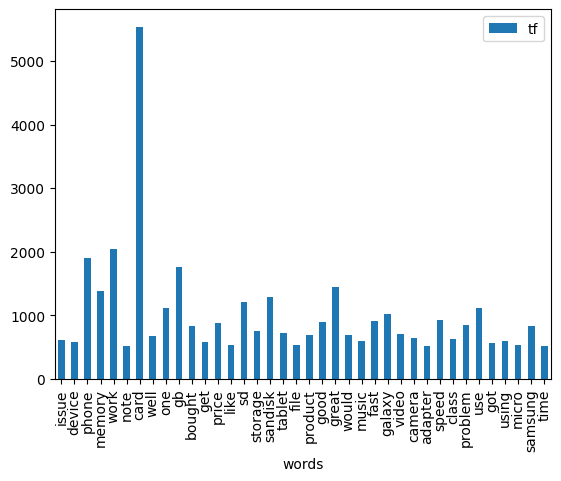

In [22]:
tf[tf['tf']>500].plot.bar(x='words',y='tf')
plt.show(block=True)

Word Cloud

we create and visualize a word cloud.The purpose is to display the frequently occurring words in the dataset in a visual format, clearly showcasing their importance and prevalence in the comments. This allows for a quick observation of the key trends and prominent features in the text data.

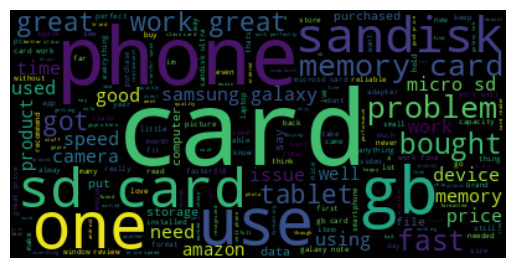

In [23]:
text=' '.join(i for i in df.reviewText)
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

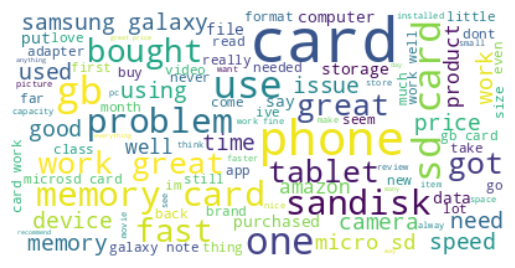

In [24]:
wordcloud = WordCloud(max_font_size=50,
                       max_words=100,
                       background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud.png")

Sentiment Analysis

we will perform sentiment analysis on our text data. We will evaluate the emotional expressions in the texts using mathematical methods to determine whether these texts are generally positive, negative, or neutral in sentiment. This allows us to express the sentiment of the texts in numerical values, enabling a more objective and measurable analysis.

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [26]:
df['reviewText'].head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit envelope...
Name: reviewText, dtype: object

In [27]:
sia=SentimentIntensityAnalyzer()

In [28]:
sia.polarity_scores("this is a great movie")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [29]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [30]:
df['reviewText'][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
3    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...
4    {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co...
7    {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [31]:
df['reviewText'][0:10].apply(lambda x: sia.polarity_scores(x)['compound'])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [32]:
df['polarity_score']=df['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else supposed pur...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0,0.87
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,0.82
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound running short space gb sandis...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,0.00
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0,0.92


Feature Engineering

sentiment analysis is conducted to determine the emotional tone of the texts, and each comment is labeled as 'positive' (pos) or 'negative' (neg) based on its compound sentiment score.

we examine the distribution of these sentiment labels in the dataset and their relationship with overall rating scores. Finally, we convert these sentiment labels into numerical values for use in machine learning models. These steps help us extract meaningful features from our text data, preparing it for further analysis and modeling stages.

In [33]:
df['reviewText'][0:10].apply(lambda x: 'pos' if sia.polarity_scores(x)['compound'] > 0 else 'neg')

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [34]:
df['sentiment_label']=df['reviewText'].apply(lambda x: 'pos' if sia.polarity_scores(x)['compound'] > 0 else 'neg')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos


In [35]:
df['sentiment_label'].value_counts()

sentiment_label
pos    3944
neg     971
Name: count, dtype: int64

In [36]:
df.groupby('sentiment_label')['overall'].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [37]:
df['sentiment_label']=LabelEncoder().fit_transform(df['sentiment_label'])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,1


In [38]:
y=df['sentiment_label'] #dependent variable

In [39]:
x=df['reviewText'] #independent variable

Count Vectors

the texts in the 'reviewText' column are transformed into numerical vectors using the CountVectorizer method. During this transformation process, the frequency of each word in the texts is calculated, and these frequencies are used to convert each text into a numerical vector.

Word Frequency

In [40]:
vectorizer = CountVectorizer()

In [41]:
X_count=vectorizer.fit_transform(x)

In [42]:
vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [43]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

N-Gram Frequency

In [44]:
vectorizer2 = CountVectorizer(analyzer='word',ngram_range=(2,2))

In [45]:
X_n=vectorizer2.fit_transform(x)

In [46]:
vectorizer2.get_feature_names_out()[10:15]

array(['ability put', 'ability sandisk', 'ability something',
       'ability stick', 'ability store'], dtype=object)

In [47]:
X_n.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

TF-IDF

Word

In [48]:
tf_idf=TfidfVectorizer()

In [49]:
X_tf=tf_idf.fit_transform(x)

N-Gram

In [50]:
tf_idf_ngram=TfidfVectorizer(ngram_range=(2,3))

In [51]:
X_tf_idf_ngram=tf_idf_ngram.fit_transform(x)

#####Sentiment Modeling

Logistic Regression

In [52]:
log_model=LogisticRegression().fit(X_tf,y)

In [53]:
cross_val_score(log_model,X_tf,y,scoring='accuracy',cv=5).mean()

0.830111902339776

In [54]:
new_review=pd.Series("this product is great")

In [55]:
new_review=pd.Series('look at that shit very bad')

In [56]:
new_review=pd.Series("it was good but I am sure that it fits me well")

In [57]:
new_review=TfidfVectorizer().fit(x).transform(new_review)

In [58]:
log_model.predict(new_review)

array([1])

In [59]:
random_review=pd.Series(df['reviewText'].sample(1).values)

In [60]:
new_review-TfidfVectorizer().fit(x).transform(random_review)

<1x3665 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [61]:
log_model.predict(new_review)

array([1])

Random Forests

In [62]:
#count Vectors
rf_model=RandomForestClassifier().fit(X_count,y)
cross_val_score(rf_model,X_count,y,cv=5,n_jobs=-1).mean()

0.8445574771108852

In [63]:
#TF-IDF Word-Level
rf_model=RandomForestClassifier().fit(X_tf,y)
cross_val_score(rf_model,X_tf,y,cv=5,n_jobs=-1).mean()

0.8268565615462868

In [64]:
rf_model=RandomForestClassifier().fit(X_tf_idf_ngram,y)
cross_val_score(rf_model,X_tf_idf_ngram,y,cv=5,n_jobs=-1).mean()

0.787792472024415

Hyperparameter Optimization

In [72]:
rf_model=RandomForestClassifier(random_state=17)

In [73]:
rf_params={'max_depth':[8,None],
           'max_features':[7,'auto'],
           'min_sample_split':[2,5,8],
           'n_estimators':[100,200]}

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(max_depth=8, max_features=7, random_state=17)

# Define the parameter grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the corrected parameters
rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1)

# Fit the model
rf_best_grid.fit(X_count, y)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_features=7,
                                              random_state=17),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [76]:
rf_best_grid.best_params_

{'bootstrap': True,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [77]:
rf_final=rf_model.set_params(**rf_best_grid.best_params_,random_state=17).fit(X_count,y)

In [78]:
cross_val_score(rf_final,X_count,y,cv=5,n_jobs=-1).mean()

0.8024415055951171